### import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the dataset


In [ ]:
train = pd.read_csv(r"/train(1).csv")

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


### Initial inferences
Here is an excerpt of the the data description for the competition:

- Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
- Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
- Features without these designations are either continuous or ordinal.
- Values of -1 indicate that the feature was missing from the observation.
- The target columns signifies whether or not a claim was filed for that policy holder.

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


We indeed see the following

- binary variables
- categorical variables of which the category values are integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable

Let's look at the number of rows and columns in the train data

In [ ]:
train.shape

(595212, 59)

We have 59 variables and 5,95,212 rows.

Let's see if there are duplicate rows in the training data.

In [ ]:
train.drop_duplicates()
train.shape

(595212, 59)

No duplicate rows, so that's fine.

So later on we can create dummy variables for the 14 categorical variables. The bin variables are already binary and do not need dummification.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Again, with the info() method we see that the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1.

## Metadata
To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific Variables/Features for analysis, visualization, modeling, ...

Concretely we will store:

- role: input, ID, target
- level: nominal, interval, ordinal, binary
- keep: True or False
- dtype: int, float, str

In [ ]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [ ]:
meta.head()

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64


#### Example to extract all nominal variables that are not dropped

In [ ]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

Below are the number of variables available per role & level, as displayed.

In [ ]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics
We can also apply the describe method on the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this as per the data type.

### Interval variables

In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### Binary variables¶

In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking the 1 and 0 distribution of the 'Target Variable'
train["target"].value_counts()

0    573518
1     21694
Name: target, dtype: int64

### Class imbalance in Target column 

- A priori in the train data is 3.645%, which is strongly imbalanced.
- From the means we can conclude that maximum entries in 'target' are 0.

## Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

- oversampling records with target=1
- undersampling records with target=0

There are many more strategies but as we have a rather large training set, we can go for undersampling.

In [ ]:
desired_apriori=0.12

# Get original number of records per target value
nb_0 = len(train[train.target==0])
nb_1 = len(train[train.target==1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling (i.e. training records from this point on): {}'.format(undersampled_nb_0))

Rate to undersample records with target=0: 0.2773920493050494
Number of records with target=0 after undersampling (i.e. training records from this point on): 159089


In [ ]:
# Split the dataframe based on target==0
undersampled_df_0 = train[train.target==0].sample(undersampled_nb_0)

df_1 = train[train.target==1]

temp_lst = [undersampled_df_0, df_1]
train = pd.concat(temp_lst) #Final undersampled DataFrame

In [ ]:
train.shape

(180783, 59)

We'll now be using this new 'balanced' dataset for rest of the EDA and Model building

## Data Quality Checks

### Checking missing values
Missings are represented as -1

In [ ]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 89 records (0.05%) with missing values
Variable ps_ind_04_cat has 45 records (0.02%) with missing values
Variable ps_ind_05_cat has 1921 records (1.06%) with missing values
Variable ps_reg_03 has 32053 records (17.73%) with missing values
Variable ps_car_01_cat has 51 records (0.03%) with missing values
Variable ps_car_03_cat has 123990 records (68.58%) with missing values
Variable ps_car_05_cat has 80167 records (44.34%) with missing values
Variable ps_car_07_cat has 3851 records (2.13%) with missing values
Variable ps_car_09_cat has 210 records (0.12%) with missing values
Variable ps_car_11 has 2 records (0.00%) with missing values
Variable ps_car_14 has 13096 records (7.24%) with missing values
In total, there are 11 variables with missing values


- ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. TREATMENT: Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- ps_reg_03 (continuous) has missing values for 18% of all records. TREATMENT: Replace by the mean.
- ps_car_11 (ordinal) has only 5 records with misisng values. TREATMENT: Replace by the mode.
- ps_car_12 (continuous) has only 1 records with missing value. TREATMENT: Replace by the mean.
- ps_car_14 (continuous) has missing values for 7% of all records.TREATMENT: Replace by the mean.

In [ ]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)

meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta
# Imputing with the mean or mode

In [ ]:
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables
Cardinality refers to the number of different values in a variable(the number of factors under each column heading). As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

Challenges faced when encoding Categorical columns with high cardinality:
- Label Encoding (scikit-learn): i.e. mapping integers to classes. It returns a nice single encoded feature column, it imposes a false sense of ordinal relationship (e.g. 135 > 72).

- One Hot / Dummy Encoding (scikit-learn): i.e. expanding the categorical feature into lots of dummy columns taking values in {0,1}. This is infeasible for categorical features having e.g. >10,000 unique values. It brings high dimensionality

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [ ]:
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [ ]:
lst =[]
lst1=[]

for i in v:
    lst.append(i)
    lst1.append(train[i].value_counts().shape[0])

temp =pd.DataFrame({"colname":lst,"distinct_values":lst1})
temp.sort_values("distinct_values",ascending=False)

,colname,distinct_values
11,ps_car_11_cat,104
6,ps_car_06_cat,18
3,ps_car_01_cat,13
5,ps_car_04_cat,10
2,ps_ind_05_cat,8
9,ps_car_09_cat,6
0,ps_ind_02_cat,5
1,ps_ind_04_cat,3
7,ps_car_07_cat,3
10,ps_car_10_cat,3


#### 'ps_car_11_cat' has 104 distinct values, and is reasonable.
#### 'ps_car_06_cat' has 18 distinct values

In [ ]:
train.shape

(180783, 57)

In [ ]:
#Number of columns that'll have to be created if we One Hot Encode the categorical features
sum(temp.distinct_values) - len(temp)

165

### if the categorical variables are One Hot encoded, we'll have 179 additional columns(features)

In [ ]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, target=None, min_samples_leaf=1, smoothing=1, noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    return add_noise(ft_trn_series, noise_level)

In [ ]:
train_encoded = target_encode(train["ps_car_11_cat"],target=train.target,min_samples_leaf=100,
                             smoothing=10, noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Hence Label Encoding improved performance of Macine Learning model.

## Exploratory Data Visualization¶

### Categorical variables
#### We'll be visualizing all the categorical variables
Let's look into the categorical variables and the proportion of customers with target = 1

<Figure size 432x288 with 0 Axes>

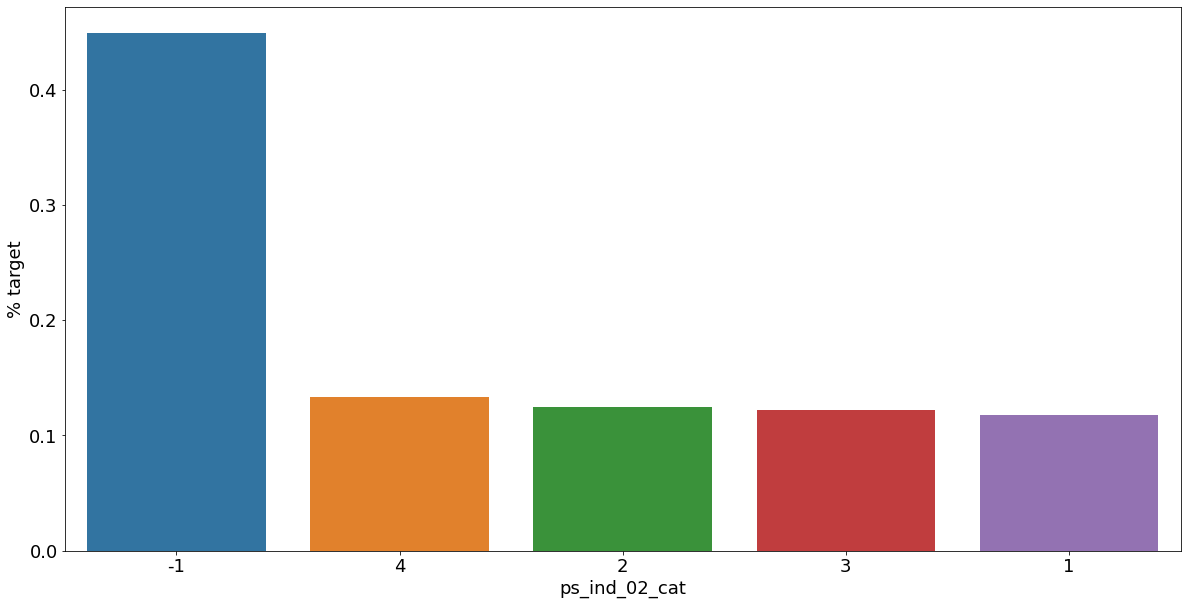

<Figure size 432x288 with 0 Axes>

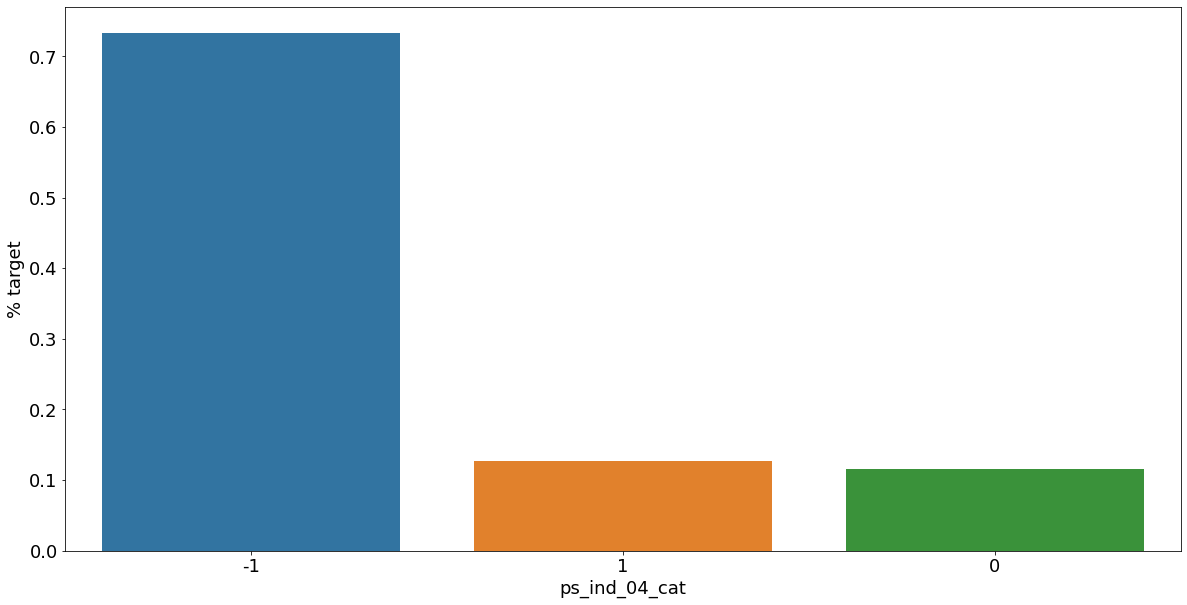

<Figure size 432x288 with 0 Axes>

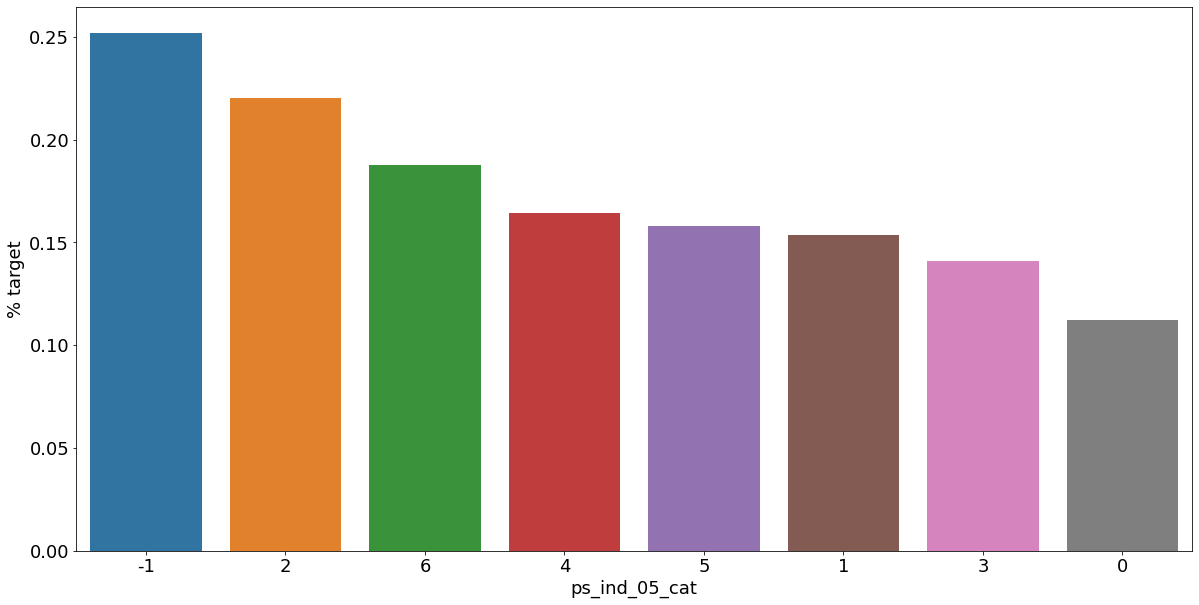

<Figure size 432x288 with 0 Axes>

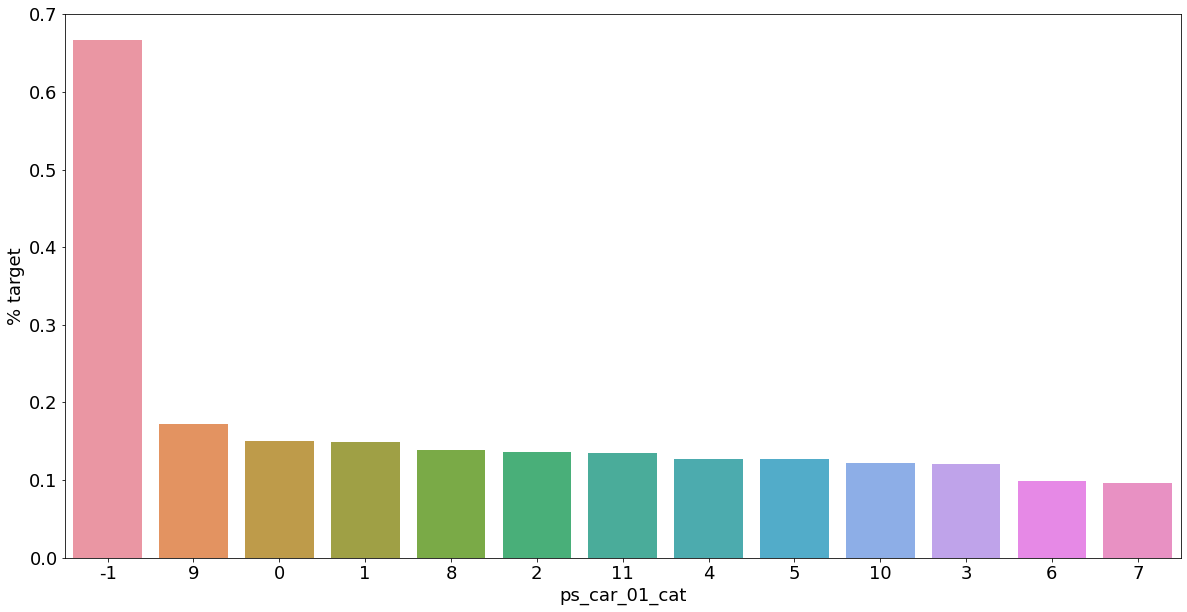

<Figure size 432x288 with 0 Axes>

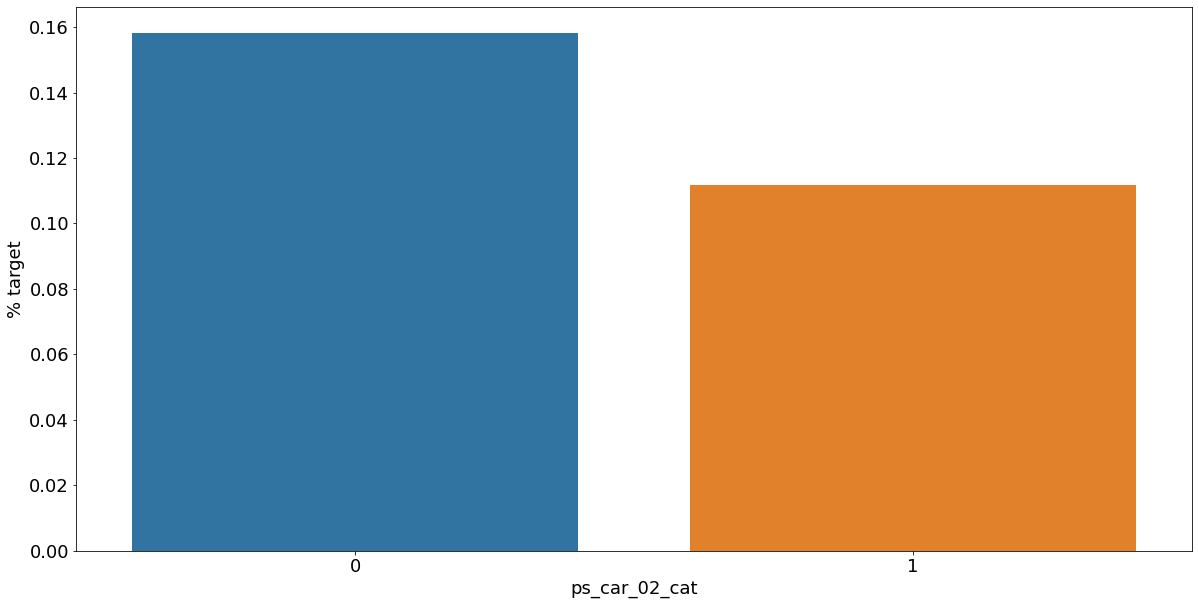

<Figure size 432x288 with 0 Axes>

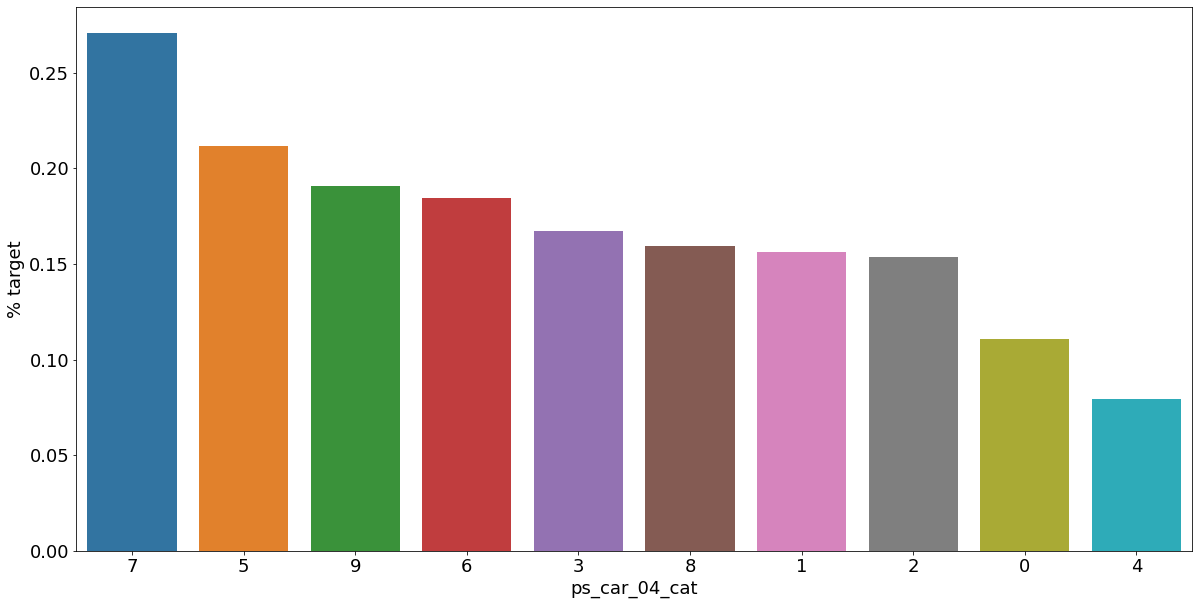

<Figure size 432x288 with 0 Axes>

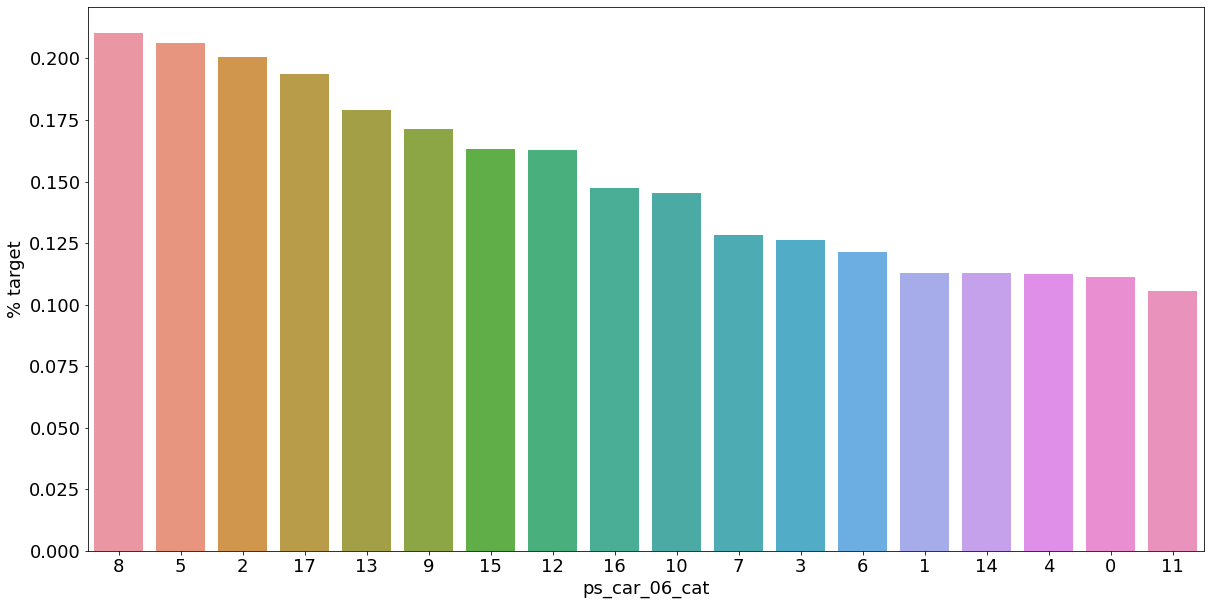

<Figure size 432x288 with 0 Axes>

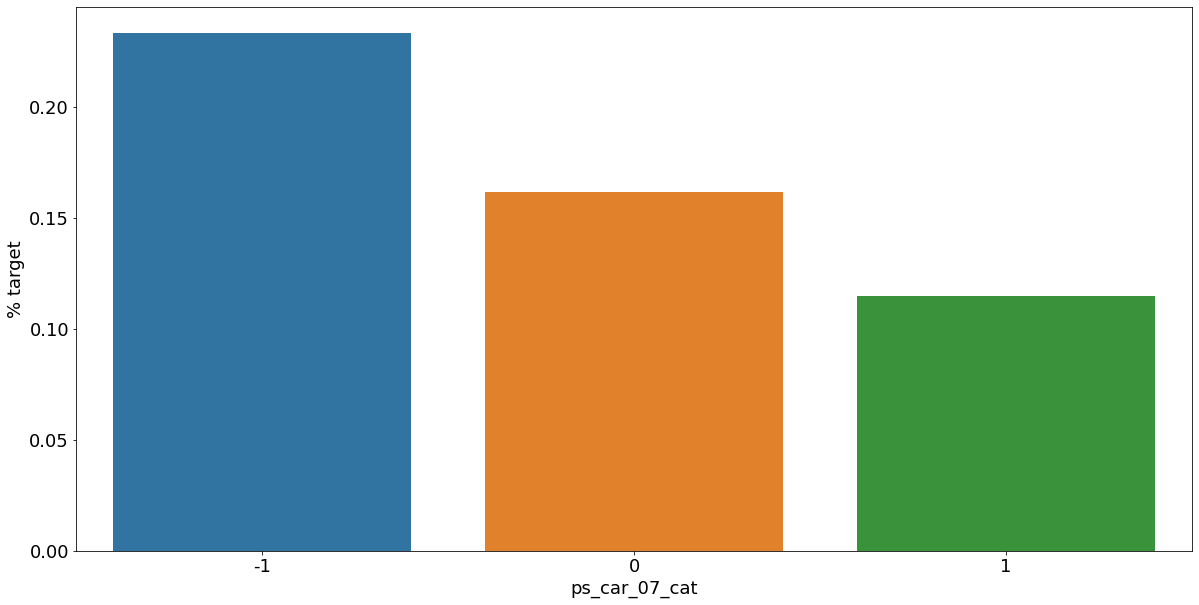

<Figure size 432x288 with 0 Axes>

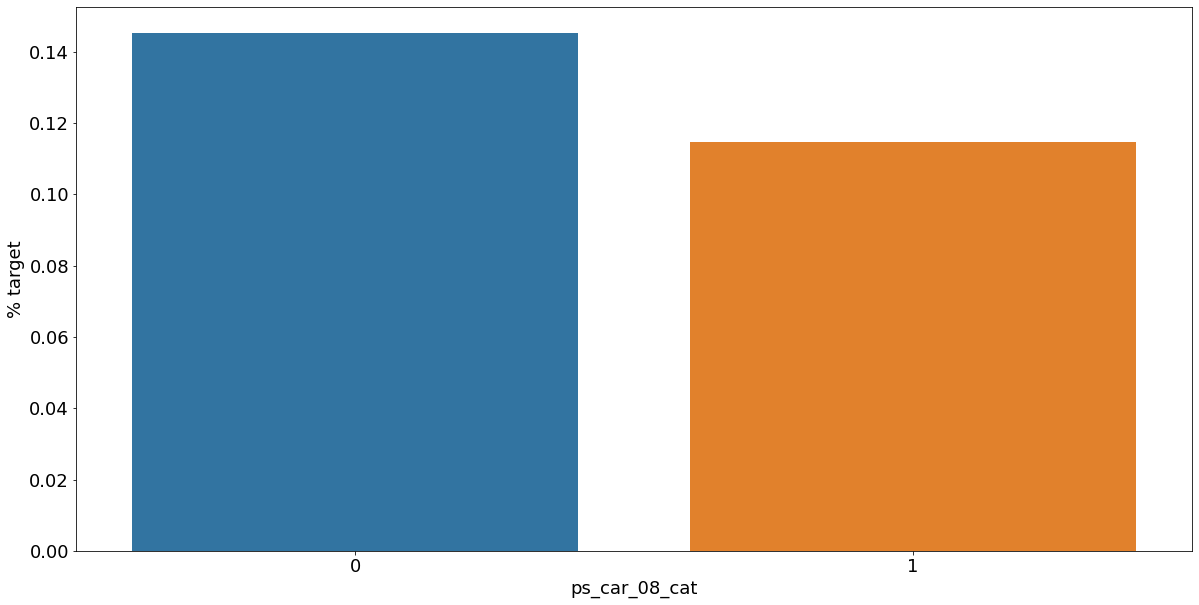

<Figure size 432x288 with 0 Axes>

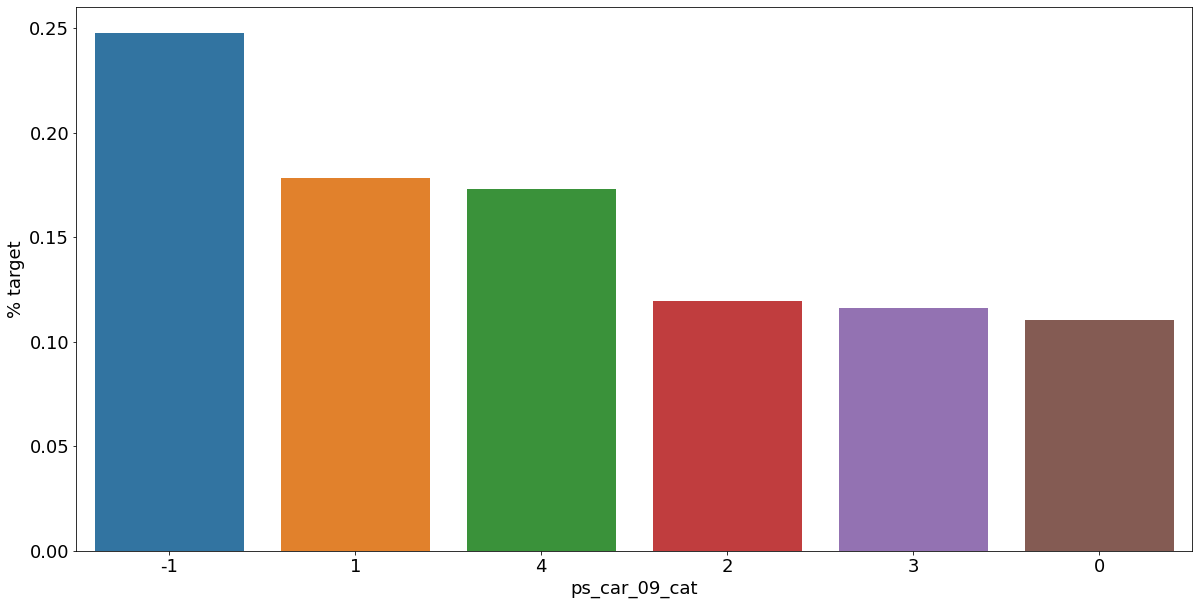

<Figure size 432x288 with 0 Axes>

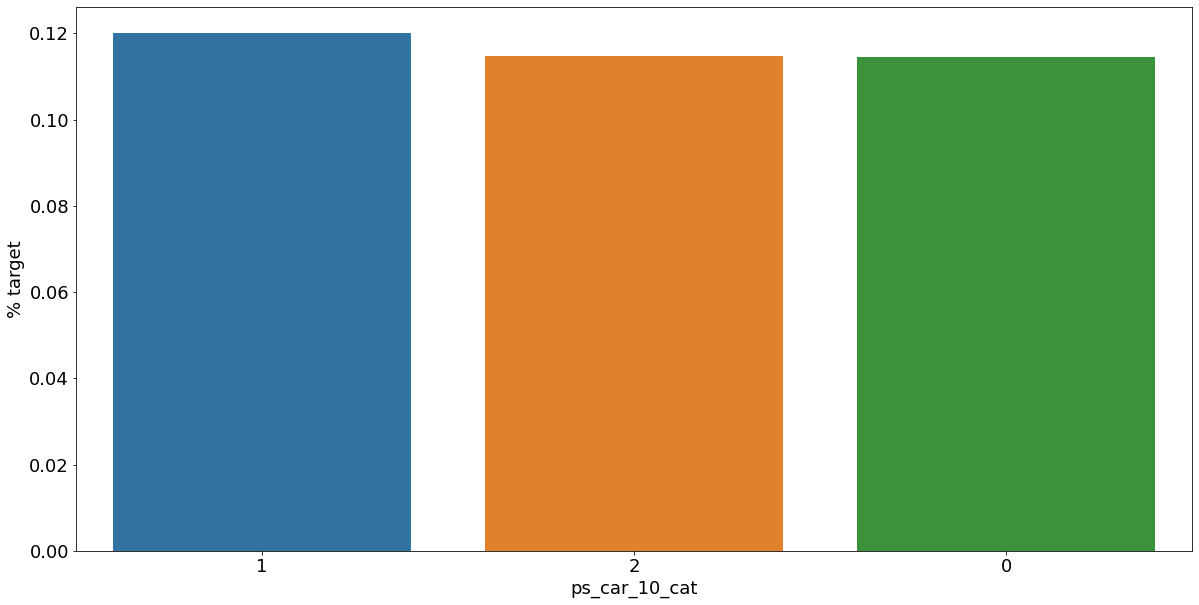

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

## Interval variables¶
Checking the correlations between interval variables. We'll use a heatmap to visualize and read the same.

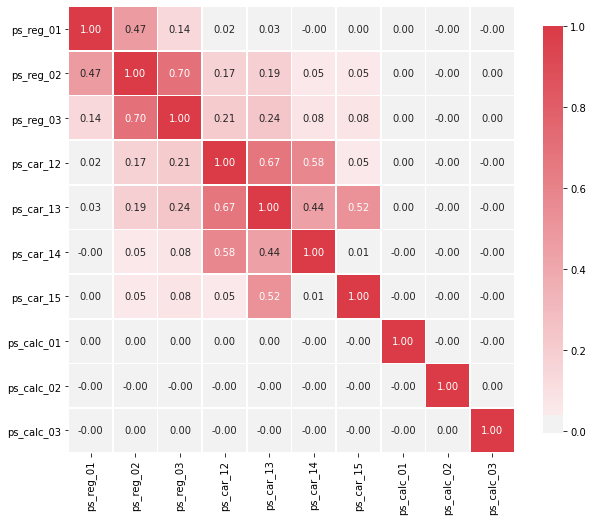

In [ ]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a pairplot to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.

In [ ]:
s = train.sample(frac=0.1)

ps_reg_02 and ps_reg_03 show, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.

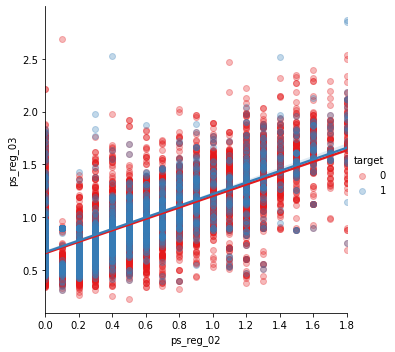

In [ ]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

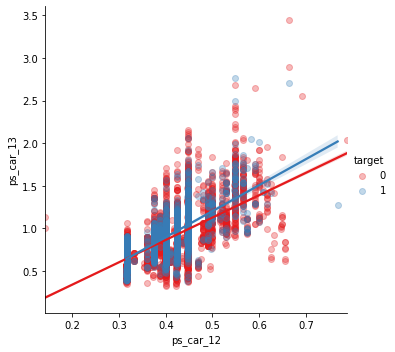

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

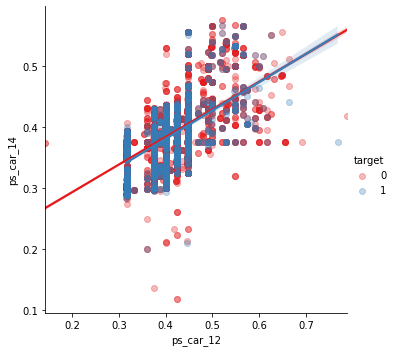

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

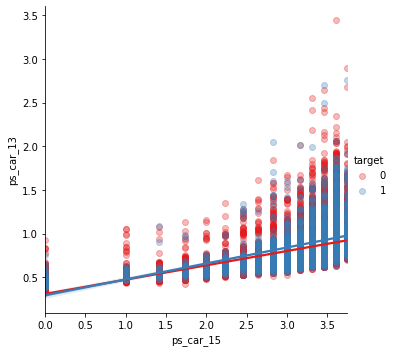

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

## Feature engineering¶
Creating dummy variables

The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.


In [ ]:
#Encoding categorical variables
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 108 variables in train


## Feature selection¶
 
We know, if the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.Hence, we will be removing features with low or zero variance

Personally, I prefer to let the RandomForestclassifier algorithm choose which features to keep. But we can do the same by ourselves as well i.e. remove features with zero or very low variance. Sklearn has a called 'VarianceThreshold',made for this. By default it removes features with zero variance.
But if we would remove features with less than 1% variance, we would remove 26 variables.

In [ ]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have very low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

26 variables have very low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2']


#### Selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

In [ ]:
sc = StandardScaler()
X_trainSC = sc.fit_transform(train.drop(['id', 'target'], axis=1).values)
y_train = train['target'].values

feat_labels = train.drop(["id","target"],axis=1).columns

rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

rf.fit(X_trainSC, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_trainSC.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.052686
 2) ps_car_13                      0.051905
 3) ps_reg_03                      0.047280
 4) ps_car_14                      0.040351
 5) ps_calc_10                     0.033851
 6) ps_calc_14                     0.033513
 7) ps_calc_11                     0.031718
 8) ps_ind_15                      0.030642
 9) ps_ind_03                      0.030560
10) ps_reg_02                      0.029077
11) ps_calc_03                     0.028994
12) ps_calc_01                     0.028984
13) ps_calc_02                     0.028845
14) ps_calc_13                     0.027154
15) ps_calc_08                     0.025462
16) ps_calc_07                     0.025426
17) ps_car_15                      0.024975
18) ps_calc_06                     0.023986
19) ps_calc_09                     0.023456
20) ps_reg_01                      0.022772
21) ps_ind_01                      0.022637
22) ps_calc_05                     0.022301
23) ps_calc_04                  

### Let's plot the same to get a better clarity in division of importances of features

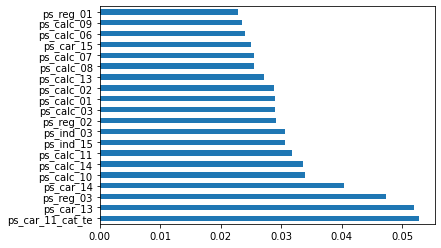

In [ ]:
(pd.Series(rf.feature_importances_, index=train.drop(["id","target"],axis=1).columns)
   .nlargest(20)
   .plot(kind='barh'))

With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the get_support method we can then limit the number of variables in the train data.

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_trainSC.shape[1]))
n_features = sfm.transform(X_trainSC).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 106
Number of features after selection: 53


## Feature scaling
As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [ ]:
#Combining the selected features and target for Modelling now
train = train[selected_vars + ['target']]

#### Setting data set for Training Machine Learning models


In [ ]:

X = train.drop(["target"],1)
features = X.columns
X = X.values

y=train["target"].values

#Splitting into train and test, in the ratio of 80:20
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

sc = StandardScaler()

#x_train,and x_test With Scaling
x_trainSC = sc.fit_transform(x_train)
x_testSC = sc.fit_transform(x_test)

Since, most of the Categorical variables have high cardinality , we'll tranform all the features by StandardScaler function.

## Training Models

#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

#Simple Logistic Regression Model
logr = LogisticRegression()
logr.fit(x_trainSC,y_train)
y_pred = logr.predict(x_testSC)

print("Training set is scaled, Logistic Regression Report:\n",classification_report(y_test,y_pred))

Training set is scaled, Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     31832
           1       0.78      0.00      0.00      4325

    accuracy                           0.88     36157
   macro avg       0.83      0.50      0.47     36157
weighted avg       0.87      0.88      0.82     36157



The above shows that, the model will be 100% successful in predicting customer's who'll not Claim Insurance in the next year. This is not the goal, we need the model to predict the one's who will claim. So we need a better value for recall and hence, f1-score accuracy

In [ ]:
param_grid = {'penalty':['l1','l2','elasticnet'],'C':[3,5],'max_iter':[100,150],'class_weight':["balanced"]}

grid = GridSearchCV(LogisticRegression(),param_grid,refit = True, verbose=0)
grid.fit(x_trainSC,y_train)
print("Best Parameters are : ",grid.best_params_)
y_pred = grid.predict(x_testSC)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/

Best Parameters are :  {'C': 3, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.91      0.62      0.74     31832
           1       0.17      0.56      0.26      4325

    accuracy                           0.61     36157
   macro avg       0.54      0.59      0.50     36157
weighted avg       0.82      0.61      0.68     36157



Inferences that can made from the above analysis:
- The LogisticRegression model in the second case is able to better handle the imbalance in target variable and yield a higher recall .
- Precision for labelling '1' went down from 78% to 17%
- Recall denotes the success of predictions and it improved from 0% to 56% 

We know, F1 score reaches its best value at 1 and worst score at 0. It is the weighted average of Recall and Precision scores

         Formula : F1 = 2 * (precision * recall) / (precision + recall)
    

# LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

param_grid = {'C':[10,15],'max_iter':[100,150],'dual':[False],'class_weight':["balanced"]}

grid = GridSearchCV(LinearSVC(),param_grid,refit = True, verbose=1)
grid.fit(x_trainSC,y_train)
print("Best Parameters are : ",grid.best_params_)
y_pred = grid.predict(x_testSC)
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   50.5s finished


Best Parameters are :  {'C': 10, 'class_weight': 'balanced', 'dual': False, 'max_iter': 100}
              precision    recall  f1-score   support

           0       0.91      0.62      0.74     31832
           1       0.17      0.56      0.26      4325

    accuracy                           0.61     36157
   macro avg       0.54      0.59      0.50     36157
weighted avg       0.82      0.61      0.68     36157



As can be noticed above C:10, max_iter = 100, gives a better F-1 accuracy, than when we use C: 15 and max_iter = 150.


# SVC

In [ ]:
#Building a 100K records dataset for SVM ( as asked in the question )
#Maintaining the ratio, 12% of 1's and 88% of 0's in TARGET, as mentioned in the project questions
df_1 = train[train["target"]==1].sample(int(100000*0.12))
df_0 = train[train["target"]==0].sample(int(100000*(0.88)))
df_temp = [df_1,df_0]
train_svm = pd.concat(df_temp)

x_train_svm,x_test_svm,y_train_svm,y_test_svm = train_test_split(train_svm.drop("target",1),train_svm["target"].values,test_size = 0.2,random_state = 10)

#Standardizing the values
x_train_svm = sc.fit_transform(x_train_svm)
x_test_svm = sc.fit_transform(x_test_svm)


In [ ]:
#from sklearn.svm import SVC
#param_grid = {'C':[5], 'kernel':['sigmoid','rbf'],"class_weight":["balanced"]}
#grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
#grid.fit(x_train_svm,y_train_svm)

#print("Best Parameters are: \n", grid.best_params_)
#y_pred = grid.predict(x_test_svm)
#print("Classification Report : \n",classification_report(y_test_svm,y_pred))


# XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate =0.05,n_estimators=100, max_depth=4 ,min_child_weight=1,
                          gamma=6, subsample=0.8, colsample_bytree=0.8,scale_pos_weight = 6, objective= 'binary:logistic', nthread=4, seed=34)

xgb_model.fit(x_trainSC, y_train, eval_metric = 'auc')

y_pred = xgb_model.predict(x_testSC)
print("Classification Report :\n",classification_report(y_test,y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     31832
           1       0.20      0.38      0.26      4325

    accuracy                           0.74     36157
   macro avg       0.55      0.59      0.55     36157
weighted avg       0.82      0.74      0.77     36157



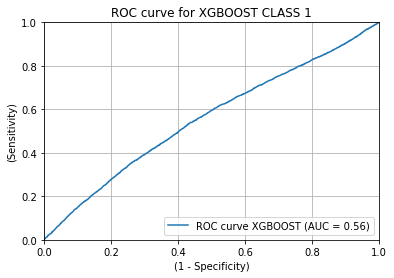

In [ ]:
from sklearn.metrics import roc_curve, auc

xgb_pred_prob = xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for XGBOOST CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

##### XGBoost yields a good F1-score Accuracy, depending upon the choice of penalty on the basis of "scale_pos_weight"

Low F1 score could be due to:
- Excess dimensions in the dataset,that makes generalizing difficult
- Further Undersampling required, to decrease the data skewness


### Comparing Adaboost and XGboost:
    
In complex and high-dimension problems
XGBoost works better. Both of these methods are built based on the idea of converting weak learners 
to a strong learner by updating based on the residuals (XGBoost) or misclassifications (AdaBoost). 
In my opinion, the main difference is not in the base learner or loss function. 
The main difference which makes XGBoost work better is its optimization 
algorithm which gives us more control (re: step and direction) to search the optimization landscape.

AdaBoost can be sensitive to outliers / label noise because it is fitting a 
classification model (an additive model) to an exponential loss function, and
the exponential loss function is sensitive to outliers/label noise i.e., what this means is at each stage it is
adding another weighted model to the overall classifier it is learning, with the overall objective of minimizing 
the exponential loss of the combined classifier on the training data.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,15,2), activation='relu',alpha=1e-5 ,solver='adam', max_iter=1000,shuffle=True)
mlp.fit(x_trainSC,y_train)

y_pred = mlp.predict(x_testSC)
y_pred2 = mlp.predict(x_trainSC)

print("Training verdict: \n",classification_report(y_train,y_pred2))

print("Test verdict: \n",classification_report(y_test,y_pred))

Training verdict: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94    127257
           1       0.82      0.07      0.12     17369

    accuracy                           0.89    144626
   macro avg       0.85      0.53      0.53    144626
weighted avg       0.88      0.89      0.84    144626

Test verdict: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     31832
           1       0.20      0.02      0.03      4325

    accuracy                           0.87     36157
   macro avg       0.54      0.50      0.48     36157
weighted avg       0.80      0.87      0.83     36157



F1 score was highest for XGBoostClassifier

Q.If not missing a positive sample is the priority which model is best so far?

Ans: For such a case, we'll need high precision. XGboost again yields high precision. However, SVC/linearSVC can yield high precision provided we constrict the "C" restriction and let less labels be misclassified 